## Занятие 4. Оценка точности моделей

Веберите любые данные для задач классификации и регресии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проверьте качество построенных моделей логистической регрессии (для классификации) и линейной регрессии (для задачи регрессии) в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 29/11/2021

## Импорты

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Данные

*Источник:* https://github.com/jbrownlee/Datasets

*Название:* **Cancer (Haberman's)**

### Описание данных

Данные о пациентах больных раком.

### Описание полей

1. **age** — возраст пациента;
1. **operation_year** — год операции 19##;
1. **axillary_nodes** — количество обнаруженных положительных узлов;
1. **survival_status** — выживаемость после операции:
    - 1 $-$ пациент прожил 5 лет и более 
    - 2 $-$ пациент умер в течение 5 лет

Смотрим на данные.

In [2]:
filename = "haberman.csv"
names = ["age", "operation_year", "axillary_nodes", "survival_status"]
dataframe = read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
dataframe.describe()

,age,operation_year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
X = array[:,0:3]
Y = array[:,3]

## Обучающая, валидационная, тестовая выборка

## Train and Test Sets

In [5]:
# Evaluate using a train and a test set
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 74.257%


Чтобы оценить производительность модели в наборе данных, нам нужно измерить, насколько хорошо прогнозы, сделанные ею, соответствуют наблюдаемым данным.

При помощи `LogisticRegression` создаем модель. Далее при помощи `fit` делаем подгонку, то есть обучаем нашу модель, `fit` возвращает экземпляр модели и связывает последние два оператора.

`score` принимает входные и выходные данные в качестве аргументов и возвращает отношение количества правильных прогнозов к количеству наблюдений.

 В нашем случае точность получаемых результатов модели равна __74%__, что говорит о том, что модель достаточно точно предсказывает результат.

## k-fold Cross-Validation

In [6]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 74.839% (8.716%)


Метод `KFold` принимает в качестве аргументов количество выборок на которое надо разбить датасет, следует ли перетасовывать датасет, и числовую затравку для псевдослучайного генератора чисел, используемого до перетасовки датасета.

При помощи `LogisticRegression` создаем модель. Функция `cross_val_score` возвращает точность для всех сгибов. Значения для 4 параметров должны быть переданы в класс `cross_val_score` . Первый параметр $-$ это наша модель. Второй и третий параметры, X и Y - данные из наших массивов. Наконец, количество сгибов передается параметру `cv`, иными словами критерий создания выборок, `kfold`.

При помощи метода `mean` выводим среднее значение всех точностей, а для вывода стандартного отклонения используем метод `std`.

В нашем случае среднее значение точности __75%__, что говорит о том, что модель часто выдает истинные значения, величина стандартного отклонения же равна __9%__, отклонение мало, что означает, что наша модель имеет низкую дисперсию, что на самом деле очень хорошо, поскольку это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах.

## Leave One Out Cross-Validation

`LeaveOneOut` — это простая перекрестная проверка. Каждый обучающий набор создается путем взятия всех выборок, кроме одной, причем тестовая выборка не учитывается. 

In [7]:
loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 73.856% (43.942%)


Разделим набор данных на обучающий и тестовый наборы, используя все наблюдения, кроме одного, как часть обучающего набора. Построим модель, используя только данные из обучающей выборки. Используем модель, чтобы предсказать значение для того самого последнего тестового наблюдения, и вычислим Среднеквадратическую ошибку. Наконец, мы повторяем этот процесс n раз (где n –- общее количество наблюдений в наборе), каждый раз исключая разные наблюдения. Напоследок, мы вычисляем среднее значение среднеквадратической ошибки.

Функция `cross_val_score` возвращает точность для всех сгибов. Значения для 4 параметров должны быть переданы в класс `cross_val_score` . Первый параметр $-$ это наша модель. Второй и третий параметры, X и Y - данные из наших массивов. Наконец, количество сгибов передается параметру `cv`, иными словами критерий создания выборок, `loocv`.

Таким образом, точность модели, полученной методом Leave One Out составляет __74%__,  величина стандартного отклонения же равна __44%__, отклонение достаточно мало, что означает, что наша модель имеет достаточно низкую дисперсию, это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах.

## Repeated Random Test-Train Splits

In [8]:
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 74.356% (3.996%)


`ShuffleSplit` будет случайным образом отбирать весь набор данных во время каждой итерации для создания обучающего набора и тестового набора. `test_size` и `train_size` параметры определяют, насколько большим должен быть набор тестов и обучающих тестов для каждой итерации, а `random_state` позволяет создавать несколько объектов - генераторов, которые могут использоваться в разных местах кода, но гарантированно выдавать одни и те же случайные значения.
Далее алгоритм аналогичен.

Получили среднее значение точности модели __74%__, что говорит о том, что модель часто выдает истинные значения, величина стандартного отклонения же равна __4%__, отклонение мало, что означает, что наша модель имеет низкую дисперсию,это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах.

## Метрики качества моделей

## Classification metrics

### Classification Accuracy

In [9]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.748 (0.087)


Для подсчета объекта `accuracy` с помощью `scoring` параметра, запишем в качестве аргумента функции `cross_val_score` scoring='accuracy'. Все объекты счетчика следуют соглашению о том, что более высокие возвращаемые значения лучше, чем более низкие возвращаемые значения.

Точность классификации - это число правильных прогнозов, сделанное как отношение всех сделанных прогнозов.

Это наиболее распространенная метрика оценки для задач классификации, и она также используется не по назначению. Это действительно подходит только тогда, когда в каждом классе имеется равное количество наблюдений (что бывает редко), и что все предсказания и ошибки предсказания одинаково важны, что часто не так.

В нашем случае средняя оценка точности __75%__, а величина среднего отклонения __9%__, что говорит о достаточно высокой точности в данной модели.

### Logistic Loss

In [10]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.547 (0.104)


Логарифмическая потеря является метрикой производительности для оценки предсказаний вероятностей принадлежности к данному классу.

Скалярная вероятность от 0 до 1 может рассматриваться как мера достоверности для прогноза моделью. Предсказания, которые являются правильными или неправильными, вознаграждаются или наказываются пропорционально достоверности прогноза.

`neg_log_loss` возвращает отрицательное значение метрики, поэтому чем оно меньше, тем достовернее прогноз.

В нашем случае среднее значение Logloss __55%__, а среднеквадратическое отклонение __10%__, что говорит о высокой достоверности прогноза.

### Area Under ROC Curve

In [11]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.707 (0.114)


Область под кривой ROC (или AUC для краткости) является метрикой производительности для задач двоичной классификации.

AUC представляет способность модели различать положительные и отрицательные классы. Площадь 1 представляет модель, которая сделала все прогнозы идеально. Площадь 0,5 представляет модель, как случайную.

В нашем случае AUC равен __0.707__, он относительно близок к 1 и больше 0.5, что говорит об умении модели предсказывать результат. Среднеквадратическое отклонение равно __0.114__, что говорит о малом разбросе данных.

### Confusion Matrix

In [12]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, model.predict(X))

array([[212,  13],
       [ 63,  18]])

Матрица путаницы - это удобное представление о точности модели с двумя или более классами.

В таблице представлены прогнозы по оси X и результаты точности по оси Y. Ячейки таблицы - это количество прогнозов, сделанных алгоритмом машинного обучения.

Для того, чтобы получить больше информации о точности модели используем  тепловую карту, которая покжет матрицу ошибок.

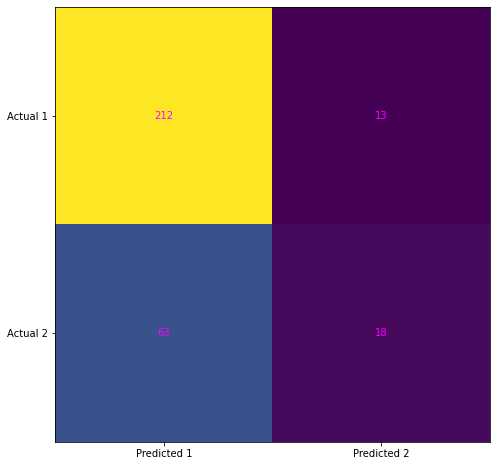

In [13]:
cm = confusion_matrix(Y, model.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 1', 'Predicted 2'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 1', 'Actual 2'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='magenta')
plt.show()

Таким образом, получили, что модель правильно предсказала истинное значение 1 $-$ 212 раз, 63 раз истинным значением оказалось 2.

Из тепловой матрицы можно увидеть, что большинство предсказаний приходится на левую вертикаль.

### Classification Report

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           1       0.77      0.93      0.84        74
           2       0.55      0.22      0.32        27

    accuracy                           0.74       101
   macro avg       0.66      0.58      0.58       101
weighted avg       0.71      0.74      0.70       101



Scikit-learn предоставляет удобный отчет при работе над задачами классификации, чтобы дать быстрое представление о точности модели с использованием ряда метрик.

Эта функция также принимает фактические и прогнозируемые выходные данные в качестве аргументов. Она возвращает отчет о классификации в виде словаря.

Функция отображает точность, отзыв, f1-балл и поддержку для каждого класса.

## Regression Metrics

### Mean Absolute Error

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.359 (0.041)


Средняя абсолютная ошибка (или MAE) представляет собой сумму абсолютных различий между прогнозами и фактическими значениями. Это дает представление о том, насколько неправильными были прогнозы.

В данном случае средняя абсолютная ошибка __0.359__, а дисперсия __0.041__, что говорит о том, что значение функции ошибки достаточно мало.

### Mean Squared Error

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.182 (0.044)


Средняя квадратическая ошибка (или MSE) очень похожа на среднюю абсолютную ошибку тем, что она дает общее представление о величине ошибки.

В нашем случае величина средней квадратической ошибки __0.182__, а дисперисия __0.044__.

### R2

In [17]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.031 (0.085)


Метрика $R^2$ (или R Squared) указывает на достоверность соответствия набора прогнозов фактическим значениям. В статистической литературе эта мера называется коэффициентом детерминации.

В нашем случае значение $R^2$ __0.031__,это значит, что прогнозы плохо соответствуют фактическим значениям, так как значение близко к нулю и меньше, чем 0,5.